In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploration

In [5]:
num_fraud = data[data['Class'] == 1]['Class'].count()
pct_fraud = num_fraud / (data['Class'].count())

print(num_fraud, pct_fraud)

492 0.001727485630620034


It's seen that the data is highly unbalanced, with only 492 out of 285k samples labeled 'positive'. The proportion of positive label is about 0.173%. Hence, while splitting data to create training & testing group, I shall draw the same proportion of samples from each label into the 2 groups, respectively. Besides, while measuring the result, confusion matrix accuracy could be biased in this case.

In [6]:
col_list = list(data.columns)
col_list.remove('Time')

high_corr = [] # above 0.7 in magnitude
mode_corr = [] # above 0.4 in magnitude
low_corr  = [] # above 0.1 in magnitude

corr_table = data[col_list].corr()
total = 0

for col in list(corr_table.columns):
    for row in list(corr_table.index):
        col_idx = list(corr_table.columns).index(col)
        row_idx = list(corr_table.index).index(row)
        if col_idx < row_idx:
            total += 1
            val     = corr_table.loc[row, col]
            val_abs = np.abs(val)
            if val_abs >= 0.7:
                high_corr.append((col, row, val))
            elif val_abs >= 0.4:
                mode_corr.append((col, row, val))
            elif val_abs >= 0.1:
                low_corr.append((col, row, val))
            
print(len(high_corr), len(mode_corr), len(low_corr), total)

0 1 21 435


In [7]:
mode_corr

[('V2', 'Amount', -0.5314089393279761)]

In [8]:
low_corr

[('V1', 'Amount', -0.2277086529223733),
 ('V1', 'Class', -0.10134729859476972),
 ('V3', 'Amount', -0.2108804752898809),
 ('V3', 'Class', -0.19296082706681578),
 ('V4', 'Class', 0.1334474862385853),
 ('V5', 'Amount', -0.3863562561629983),
 ('V6', 'Amount', 0.21598118022524546),
 ('V7', 'Amount', 0.3973112781816456),
 ('V7', 'Class', -0.1872565915137108),
 ('V8', 'Amount', -0.10307909564496406),
 ('V10', 'Amount', -0.10150214079141875),
 ('V10', 'Class', -0.21688294364035493),
 ('V11', 'Class', 0.15487564474346413),
 ('V12', 'Class', -0.2605929248764044),
 ('V14', 'Class', -0.30254369580346246),
 ('V16', 'Class', -0.1965389403034051),
 ('V17', 'Class', -0.32648106724269765),
 ('V18', 'Class', -0.11148525388869356),
 ('V20', 'Amount', 0.3394034045461327),
 ('V21', 'Amount', 0.10599892763770487),
 ('V23', 'Amount', -0.11263255363252014)]

Among 435 pairs of different variables, none has a high correlation, only 1 has moderate correlation, and 21 pairs have low correlation. Note that all those 22 notable correlations occur between a principle components and 'Amount' or 'Class', which means no obvious correlation was observed between any pair of 2 principle components. This is as expected. 

In [9]:
data[col_list].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No huge difference of scales among principle components. So, no need to do scaling before modeling.

In [10]:
import matplotlib.pyplot as plt

plt.hist(data['Amount'], 20)
plt.show()

<Figure size 640x480 with 1 Axes>

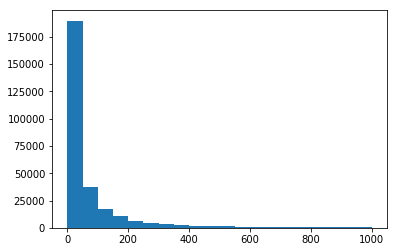

In [11]:
plt.hist(data[data['Amount'] <= 1000]['Amount'], 20)
plt.show()

In [12]:
data['Amount'].mean()

88.34961925087359

In [13]:
data_group = data.groupby('Class')['Amount'].agg(['mean','sum']).reset_index()
data_group

,Class,mean,sum
0,0,88.291022,2.510246e+07
1,1,122.211321,6.012797e+04


In [14]:
6.012797e+04 / 2.510246e+07

0.0023953018947147015

Average transaction amount for frauds is higher than legit transactions. The latter is very close to the overall average. Since the significance was not tested, no conclusion could be made based on this comparison.

# Preparation

Credit card fraud detection is cost sensitive since the cost related to each prediction case is different. I assumed the cost of any positive prediction, no matter true or false, is $5; and cost of a true negative prediction is 0. The cost of a false negative prediction is basically the transaction amount.

In [15]:
cost_TP = 5
cost_FP = 5
cost_FN = data['Amount']
cost_TN = 0

data['cost_TP'] = cost_TP
data['cost_FP'] = cost_FP
data['cost_FN'] = data['Amount']
data['cost_TN'] = cost_TN

data[['cost_TP','cost_FP','cost_FN','cost_TN']].head()

,cost_TP,cost_FP,cost_FN,cost_TN
0,5,5,149.62,0
1,5,5,2.69,0
2,5,5,378.66,0
3,5,5,123.50,0
4,5,5,69.99,0


In [16]:
fraud_data = data[data['Class'] == 1]
other_data = data[data['Class'] == 0]

fraud_test = fraud_data.sample(frac = 0.25, random_state = 0)
other_test = other_data.sample(frac = 0.25, random_state = 0)

fraud_train = fraud_data.drop(fraud_test.index)
other_train = other_data.drop(other_test.index)

data_test = pd.concat([fraud_test, other_test], axis = 0)
data_test = data_test.reset_index()

data_train = pd.concat([fraud_train, other_train], axis = 0)
data_train = data_train.reset_index()

print(data_test.shape, data_train.shape)

(71202, 36) (213605, 36)


In [17]:
X_list = list(data.columns)
X_list.remove('Time')
X_list.remove('Amount')
X_list.remove('Class')
X_list.remove('cost_TP')
X_list.remove('cost_FP')
X_list.remove('cost_TN')
X_list.remove('cost_FN')

C_list = ['cost_FP','cost_FN','cost_TP','cost_TN']
# per costcla package requirements, the cost matrix follows the order of 'FP, FN, TP, TN'

xtrain = data_train[X_list]
ytrain = data_train['Class']

xtest = data_test[X_list]
ytest = data_test['Class']

print(xtest.shape, ytest.shape)

(71202, 28) (71202,) (71202, 4)


# Modeling

In [31]:
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV

auprc = make_scorer(roc_auc_score)

max_cost = data_test[data_test['Class'] == 1]['Amount'].sum()
# the maximum cost in testing group is cost when all samples are predicted as negative
# which is the sum of all fraudulent transaction amount

max_cost

15905.13

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

params = {'C': [0.01, 0.1, 1, 2, 5, 10],
          'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(solver = 'liblinear'), params, scoring = auprc, cv = 5).fit(xtrain, ytrain)
logit_model = grid_search.best_estimator_
logit_model.fit(xtrain, ytrain)

ypred = logit_model.predict(xtest)

logit_auprc = roc_auc_score(ytest, ypred)

print(logit_auprc, grid_search.best_params_)

0.7967127953472588 {'C': 0.1, 'penalty': 'l2'}


In [26]:
data_pred = pd.DataFrame(ypred)
data_pred.columns = ['Class_Pred']

data_temp = pd.concat([data_test, data_pred], axis = 1)
data_temp.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V26,V27,V28,Amount,Class,cost_TP,cost_FP,cost_FN,cost_TN,Class_Pred
0,177195,123078.0,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,...,-0.539073,0.503418,-0.237807,11.0,1,5,5,11.0,0,0
1,30384,35899.0,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,...,-0.103716,1.166961,0.663632,1.0,1,5,5,1.0,0,1
2,151011,94364.0,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,...,-1.023078,-2.634761,-0.463931,1.0,1,5,5,1.0,0,1
3,46918,42988.0,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,...,-0.009466,2.300164,0.081231,648.0,1,5,5,648.0,0,1
4,6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,...,0.323885,0.894767,0.569519,1.0,1,5,5,1.0,0,1


In [33]:
data_temp['cost'] = 0

c_real = data_temp['Class']
c_pred = data_temp['Class_Pred']
cost_tp = data_temp['cost_TP']
cost_fp = data_temp['cost_FP']
cost_fn = data_temp['cost_FN']
cost_tn = data_temp['cost_TN']

data_temp['cost'] = c_real*(c_pred*cost_tp + (1-c_pred)*cost_fn) + (1-c_real)*(c_pred*cost_fp + (1-c_pred)*cost_tn)

logit_cost = data_temp['cost'].sum()
logit_save = 1 - (logit_cost / max_cost)

print(logit_save, logit_cost)

0.4358832653364041 8972.349999999999


In [34]:
model_results = []
model_results.append(['Logit Model', logit_auprc, logit_save])
model_results

[['Logit Model', 0.7967127953472588, 0.4358832653364041]]

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [5, 10, 15, 20, 25],
          'max_leaf_nodes': [10, 20, 30]}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 0), params, scoring = auprc, cv = 5).fit(xtrain, ytrain)
rndft_model = grid_search.best_estimator_
rndft_model.fit(xtrain, ytrain)

ypred = rndft_model.predict(xtest)

rndft_auprc = roc_auc_score(ytest, ypred)

print(rndft_auprc, grid_search.best_params_)

0.853630398879433 {'max_leaf_nodes': 30, 'n_estimators': 5}


In [37]:
data_pred = pd.DataFrame(ypred)
data_pred.columns = ['Class_Pred']

data_temp = pd.concat([data_test, data_pred], axis = 1)
data_temp.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V26,V27,V28,Amount,Class,cost_TP,cost_FP,cost_FN,cost_TN,Class_Pred
0,177195,123078.0,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,...,-0.539073,0.503418,-0.237807,11.0,1,5,5,11.0,0,1
1,30384,35899.0,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,...,-0.103716,1.166961,0.663632,1.0,1,5,5,1.0,0,1
2,151011,94364.0,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,...,-1.023078,-2.634761,-0.463931,1.0,1,5,5,1.0,0,1
3,46918,42988.0,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,...,-0.009466,2.300164,0.081231,648.0,1,5,5,648.0,0,1
4,6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,...,0.323885,0.894767,0.569519,1.0,1,5,5,1.0,0,1


In [38]:
data_temp['cost'] = 0

c_real = data_temp['Class']
c_pred = data_temp['Class_Pred']
cost_tp = data_temp['cost_TP']
cost_fp = data_temp['cost_FP']
cost_fn = data_temp['cost_FN']
cost_tn = data_temp['cost_TN']

data_temp['cost'] = c_real*(c_pred*cost_tp + (1-c_pred)*cost_fn) + (1-c_real)*(c_pred*cost_fp + (1-c_pred)*cost_tn)

rndft_cost = data_temp['cost'].sum()
rndft_save = 1 - (rndft_cost / max_cost)

print(rndft_save, rndft_cost)

0.5120266228569021 7761.279999999999


In [46]:
model_results.append(['Random Forest', rndft_auprc, rndft_save])
model_results

[['Logit Model', 0.7967127953472588, 0.4358832653364041],
 ['Random Forest', 0.853630398879433, 0.5120266228569021]]

## Logistic Regression With Cost Classification

Using the same logit model above, applied difference method of prediction, by estimating the expected cost of predicting each sample as fraud (positive) or legit (negative), and selecting the label with lower cost. Hence, the estimated probability need to be calculated first. Since Random Forest does not predict probabilities, I'll have to use cost sensitive loss function to improve the model, which is too complex.

In [41]:
logit_model.fit(xtrain, ytrain)

prob_pred = logit_model.predict_proba(xtest)

data_pred = pd.DataFrame(prob_pred)
data_pred.columns = ['Prob_0', 'Prob_1']

data_temp = pd.concat([data_test, data_pred], axis = 1)
data_temp.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V27,V28,Amount,Class,cost_TP,cost_FP,cost_FN,cost_TN,Prob_0,Prob_1
0,177195,123078.0,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,...,0.503418,-0.237807,11.0,1,5,5,11.0,0,0.824169,0.175831
1,30384,35899.0,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,...,1.166961,0.663632,1.0,1,5,5,1.0,0,0.016628,0.983372
2,151011,94364.0,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,...,-2.634761,-0.463931,1.0,1,5,5,1.0,0,0.000001,0.999999
3,46918,42988.0,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,...,2.300164,0.081231,648.0,1,5,5,648.0,0,0.001842,0.998158
4,6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,...,0.894767,0.569519,1.0,1,5,5,1.0,0,0.001645,0.998355


In [45]:
data_temp['cost_0'] = 0
data_temp['cost_1'] = 0
data_temp['Class_Pred'] = 0

prob_ne = data_temp['Prob_0']
prob_po = data_temp['Prob_1']
cost_tp = data_temp['cost_TP']
cost_fp = data_temp['cost_FP']
cost_fn = data_temp['cost_FN']
cost_tn = data_temp['cost_TN']

data_temp['cost_0'] = cost_tn*prob_ne + cost_fn*prob_po
data_temp['cost_1'] = cost_tp*prob_po + cost_fp*prob_ne
# the expected cost of each situation, chose the label with lower cost

data_temp['Class_Pred'] = np.where(data_temp['cost_1'] <= data_temp['cost_0'], 1, 0)
data_temp.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,Class,cost_TP,cost_FP,cost_FN,cost_TN,Prob_0,Prob_1,cost_0,cost_1,Class_Pred
0,177195,123078.0,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,...,1,5,5,11.0,0,0.824169,0.175831,1.934143,5.0,0
1,30384,35899.0,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,...,1,5,5,1.0,0,0.016628,0.983372,0.983372,5.0,0
2,151011,94364.0,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,...,1,5,5,1.0,0,0.000001,0.999999,0.999999,5.0,0
3,46918,42988.0,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,...,1,5,5,648.0,0,0.001842,0.998158,646.806633,5.0,1
4,6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,...,1,5,5,1.0,0,0.001645,0.998355,0.998355,5.0,0


In [47]:
ypred = data_temp['Class_Pred']
costclass_auprc = roc_auc_score(ytest, ypred)

cost_legit = data_temp['cost_0']
cost_fraud = data_temp['cost_1']

data_temp['cost'] = ypred*cost_fraud + (1-ypred)*cost_legit

costclass_cost = data_temp['cost'].sum()
costclass_save = 1 - (costclass_cost / max_cost)

print(costclass_auprc, costclass_save, costclass_cost)

0.682300765311287 0.6384813531566784 5750.001075467119


In [48]:
model_results.append(['Logit Cost Classification', costclass_auprc, costclass_save])

[['Logit Model', 0.7967127953472588, 0.4358832653364041],
 ['Random Forest', 0.853630398879433, 0.5120266228569021],
 ['Logit Cost Classification', 0.682300765311287, 0.6384813531566784]]

## Summary

In [49]:
model_results_df = pd.DataFrame(model_results)
model_results_df.columns = ['Model', 'ROC AUC Score', 'Saving Score']

model_results_df

,Model,ROC AUC Score,Saving Score
0,Logit Model,0.796713,0.435883
1,Random Forest,0.853630,0.512027
2,Logit Cost Classification,0.682301,0.638481


It is seen that the Cost Classification model resulted in the best saving score (saves around 64% of the maximum cost), but the worst ROC AUC score. This is a tradeoff because many fraudulent transactions with very low amount has been misclassified as legit. This tradeoff makes sense since those kind of misclassifications do not really hurt the value.